In [4]:
!pip install word2number

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5590 sha256=0817dd1d127831dec868284e2b82318f84e88e85a8725d27aacd5d57c62bda51
  Stored in directory: c:\users\sandy\appdata\local\pip\cache\wheels\cd\ef\ae\073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [5]:
# Library cell
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from word2number import w2n

In [38]:
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [9]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [40]:
df.shape

(8, 4)

In [12]:
df['experience'] = df['experience'].fillna('Zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [13]:
df['experience'] = df['experience'].apply(w2n.word_to_num)

In [14]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [20]:
df['test_score(out of 10)'].fillna(np.mean(df['test_score(out of 10)']),inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [23]:
df.describe()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
count,8.00000,8.000000,8.000000,8.00000
mean,4.75000,7.857143,7.875000,63000.00000
std,4.26782,1.245400,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,7.928571,7.500000,63500.00000
75%,7.75000,8.250000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


In [24]:
df.corr()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.241897,-0.29048,0.908017
test_score(out of 10),-0.241897,1.000000,0.13971,-0.002850
interview_score(out of 10),-0.290480,0.139710,1.00000,0.037820
salary($),0.908017,-0.002850,0.03782,1.000000


<Axes: >

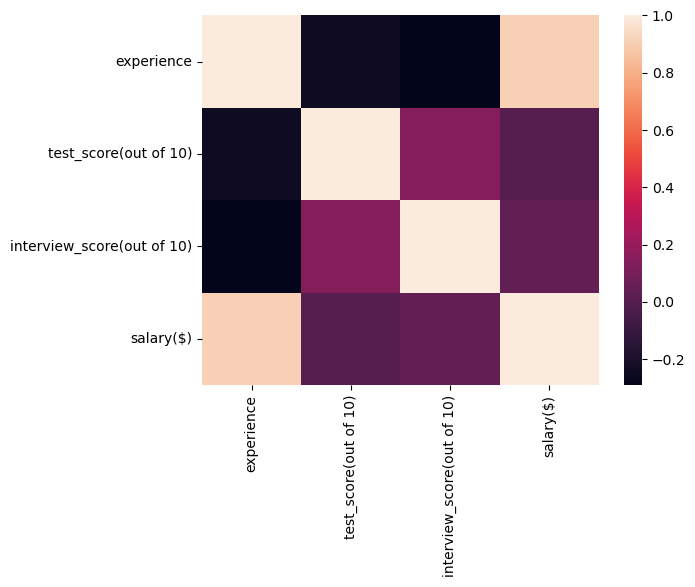

In [28]:
sns.heatmap(df.corr())

In [31]:
X = df.drop(columns = ['salary($)'])
Y = df['salary($)']

In [32]:
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [33]:
Y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [35]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [39]:
model.predict([[2,9,6]])

array([53290.89255945])

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

In [43]:
X_train.shape

(5, 3)

In [44]:
X_test.shape

(3, 3)

In [45]:
Y_train.shape

(5,)

In [46]:
Y_test.shape

(3,)

In [47]:
model_new = LinearRegression()
model_new.fit(X_train,Y_train)

LinearRegression()

In [48]:
model_new.predict(X_test)

array([46727.17913521, 62351.75017159, 77834.24845573])

In [49]:
experience,test_score,interview_score = map(int,input().split())
res = model_new.predict([[experience,test_score,interview_score]])
print(res)

 2 9 6


[54321.89430336]


In [50]:
n = int(input())
for i in range(n):
    experience,test_score,interview_score = map(int,input().split())
    res = model_new.predict([[experience,test_score,interview_score]])
    print(res)

 2
 2 9 6


[54321.89430336]


 10 10 10


[86148.59299931]
